In [87]:
import numpy as np
from typing import Tuple

def normalized(a: np.array):
    return a / np.linalg.norm(a)


def three_node_planar_rotation(theta, root: np.array, left: np.array, right: np.array) -> Tuple[np.array, np.array]:
    mid = (left + right) / 2
    t = np.linalg.norm(root - mid) * np.tan(theta / 2)
    return ((mid + t * (left - mid)), (mid + t * (right - mid)))


def angle_between_vectors(a: np.array, b: np.array) -> float:
    return np.arccos(np.dot(a, b))


def joint_point_point_angle_rad(root: np.array, n1: np.array, n2: np.array) -> float:
    n1d = normalized(n1 - root)
    n2d = normalized(n2 - root)
    return angle_between_vectors(n1d, n2d)



Angle: 60.04972654159675
Angle: 61.04972654159674


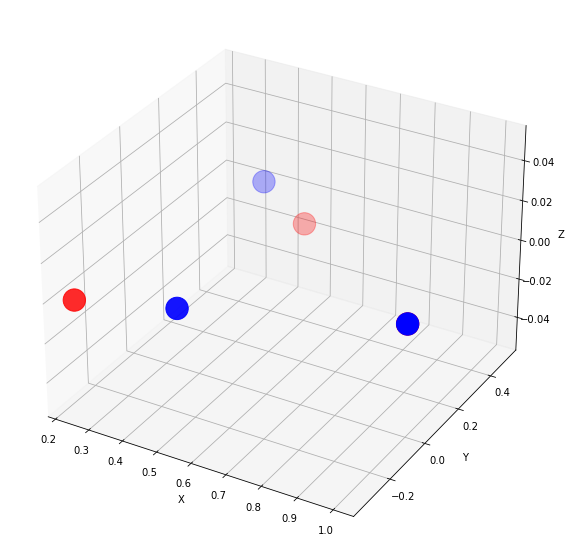

In [107]:
from scipy.spatial.transform import Rotation as R
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def _rotate(u, v, center, neighbor, theta):
    cross = normalized(np.cross(u, v))
    ht = theta / 2
    q = np.array([cross[0] * np.sin(ht), cross[1] * np.sin(ht), cross[2] * np.sin(ht), np.cos(ht)])
    rot_matrix = R.from_quat(q).as_matrix()

    origin = neighbor - center
    normalized_origin = normalized(origin)
    neighbor_center_distance = np.linalg.norm(origin)

    rotated_neighbor = np.matmul(rot_matrix, normalized_origin)

    # Since we translated to the origin, we need to translate back to our original position
    rotated_neighbor *= neighbor_center_distance
    rotated_neighbor += center

    return rotated_neighbor

def oppose_rotate(center, left, right, theta):
    u = normalized(left - center)
    v = normalized(right - center)
    return (_rotate(u, v, center, left, theta), _rotate(v, u, center, right, theta))

center = np.array([1.0, 0.0, 0.0])
left = np.array([0.534, 0.34, 0.0])
right = np.array([0.234, -0.34, 0.0])

def plot(center, left, right):
    print("Angle:", np.degrees(joint_point_point_angle_rad(center, left, right)))
    stack = np.vstack((center, left, right)).T
    v1, v2 = oppose_rotate(center, right, left, joint_point_point_angle_rad(center, left, right) + np.radians(0.5))

    stack2 = np.vstack((center, v1, v2)).T
    print("Angle:", np.degrees(joint_point_point_angle_rad(center, v1, v2)))

    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    x, y, z = stack[0, :], stack[1, :], stack[2, :]
    x2, y2, z2 = stack2[0, :], stack2[1, :], stack2[2, :]
    s = [500 for n in range(len(x))]
    ax.scatter(x, y, z, c='r', marker='o', s=s)
    ax.scatter(x2, y2, z2, c='b', marker='o', s=s)
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")

    plt.show()

plot(center, left, right)